In [344]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [345]:
df = pd.read_csv("diabetes.csv")

In [346]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [347]:
df.shape

(768, 9)

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

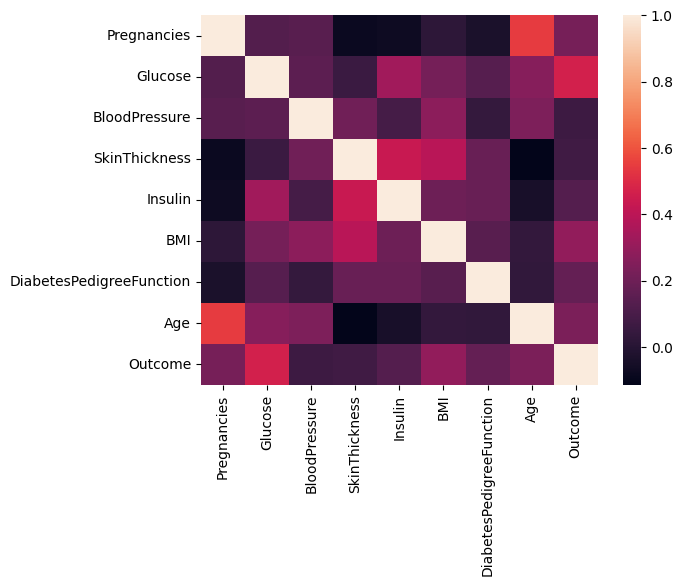

In [349]:
sns.heatmap(df.corr())

In [350]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [351]:
X = df.iloc[:, :-1]
y = df.iloc[: , -1]

In [352]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [353]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [354]:
X_train.shape[1]

8

In [355]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [356]:
model = Sequential()
model.add(Dense(32, activation='relu',  input_shape = (8, )))
model.add(Dense(16, activation='relu',))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer= 'adam', loss='binary_crossentropy', metrics=['accuracy'])

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [357]:
history = model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6369 - loss: 0.6809 - val_accuracy: 0.7056 - val_loss: 0.6424
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7467 - loss: 0.6184 - val_accuracy: 0.7100 - val_loss: 0.6132
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7881 - loss: 0.5764 - val_accuracy: 0.7273 - val_loss: 0.5881
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7838 - loss: 0.5493 - val_accuracy: 0.7273 - val_loss: 0.5687
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7951 - loss: 0.5171 - val_accuracy: 0.7186 - val_loss: 0.5513
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7785 - loss: 0.5033 - val_accuracy: 0.7229 - val_loss: 0.5361
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8184 - loss: 0.4743 - val_accuracy: 0.7186 - val_loss: 0.5286
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7913 - loss: 0.4703 - val_accuracy: 0.7143 - 

In [358]:
loss, accuracy = model.evaluate(X_test, Y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7542 - loss: 0.5458 


In [359]:
accuracy

0.7402597665786743

In [360]:
import keras_tuner as kt

In [366]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layer', min_value=1, max_value=10, step=1)):
        if i == 0:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation' + str(i), values=['sigmoid', 'relu', 'tanh']),
                input_shape=(8,)
            ))
            model.add(Dropout(hp.Choice('dropout' +str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
            
        else:
            model.add(Dense(
                hp.Int('units' + str(i), min_value=8, max_value=128, step=8),
                activation=hp.Choice('activation' + str(i), values=['sigmoid', 'relu', 'tanh'])
            ))
            model.add(Dropout(hp.Choice('dropout' +str(i), values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=hp.Choice('optimizer', values=['rmsprop', 'adam', 'sgd', 'nadam', 'adadelta']),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [371]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=3)

Reloading Tuner from .\untitled_project\tuner0.json


In [372]:
tuner.search(X_train, Y_train, validation_split = 0.2, epochs = 10)

In [373]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 6,
 'units0': 88,
 'activation0': 'relu',
 'dropout0': 0.9,
 'optimizer': 'rmsprop',
 'units1': 8,
 'activation1': 'tanh',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'sigmoid',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'sigmoid',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'sigmoid',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'sigmoid',
 'dropout5': 0.1}

In [374]:
model = tuner.get_best_models(num_models=1)[0]

c:\Users\adpub\anaconda3\envs\my_ml_env\Lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 16 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [375]:
model.fit(X_train, Y_train, epochs=200, initial_epoch=6, validation_split=0.2)

Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6193 - loss: 0.6770 - val_accuracy: 0.6204 - val_loss: 0.6717
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6587 - loss: 0.6585 - val_accuracy: 0.6204 - val_loss: 0.6670
Epoch 9/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6397 - loss: 0.6525 - val_accuracy: 0.6204 - val_loss: 0.6645
Epoch 10/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6636 - loss: 0.6460 - val_accuracy: 0.6204 - val_loss: 0.6636
Epoch 11/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7073 - loss: 0.6301 - val_accuracy: 0.6204 - val_loss: 0.6637
Epoch 12/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6639 - loss: 0.6448 - val_accuracy: 0.6204 - val_loss: 0.6643
Epoch 13/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6756 - loss: 0.6433 - val_accuracy: 0.6204 - val_loss: 0.6656
Epoch 14/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6835 - loss: 0.6305 - val_accuracy: 

In [376]:
loss, accuracy = model.evaluate(X_test, Y_test)
accuracy

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7788 - loss: 0.5464


0.7532467246055603